### Cab-Driver Agent

In [2]:
pip install keras

In [7]:
pip install --upgrade tensorflow

  Created wheel for clang: filename=clang-5.0-py3-none-any.whl size=30702 sha256=7291e26b42f426d78dcc868fcbf1d7d0112d6c74e52a3f4ba55df5cb5e133f58
  Stored in directory: c:\users\aadi\appdata\local\pip\cache\wheels\f1\60\77\22b9b5887bd47801796a856f47650d9789c74dc3161a26d608
Successfully built clang
  Attempting uninstall: numpy
    Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Aadi\\anaconda3\\Lib\\site-packages\\~umpy\\.libs\\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



In [9]:
pip install --upgrade tensorflow-gpu

  Using cached tensorflow_estimator-2.6.0-py2.py3-none-any.whl (462 kB)
  Using cached h5py-3.1.0-cp38-cp38-win_amd64.whl (2.7 MB)
  Using cached clang-5.0-py3-none-any.whlNote: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Aadi\\anaconda3\\Lib\\site-packages\\~5py\\defs.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.




  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tensorflow-estimator-2.3.0
  Attempting uninstall: h5py
    Found existing installation: h5py 2.10.0
    Uninstalling h5py-2.10.0:
      Successfully uninstalled h5py-2.10.0


In [1]:
# Importing libraries
import numpy as np
import random
import math
from collections import deque
import collections
import pickle

# for building DQN model
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.optimizers import Adam

# for plotting graphs
import matplotlib.pyplot as plt



In [32]:
# Import the environment
from CabEnvironment import CabDriver

In [33]:
env = CabDriver()

#### Defining Time Matrix

In [4]:
# Loading the time matrix provided
Time_matrix = np.load("TM.npy")

In [5]:
print(Time_matrix)

[[[[ 0.  0.  0. ...  0.  0.  0.]
   [ 0.  0.  0. ...  0.  0.  0.]
   [ 0.  0.  0. ...  0.  0.  0.]
   ...
   [ 0.  0.  0. ...  0.  0.  0.]
   [ 0.  0.  0. ...  0.  0.  0.]
   [ 0.  0.  0. ...  0.  0.  0.]]

  [[ 2.  3.  3. ...  7.  0.  6.]
   [ 2.  3.  3. ...  7.  0.  6.]
   [ 2.  3.  3. ...  7.  0.  6.]
   ...
   [ 2.  3.  6. ...  7.  4.  2.]
   [ 2.  3.  6. ...  7.  4.  2.]
   [ 2.  3.  6. ...  7.  4.  2.]]

  [[ 2.  6.  5. ...  3.  7.  7.]
   [ 2.  6.  5. ...  3.  7.  7.]
   [ 2.  6.  5. ...  3.  7.  7.]
   ...
   [ 6.  2.  8. ...  4.  5.  5.]
   [ 6.  2.  8. ...  4.  5.  5.]
   [ 6.  2.  8. ...  4.  5.  5.]]

  [[10.  6.  8. ...  7.  4.  6.]
   [10.  6.  8. ...  7.  4.  6.]
   [10.  6.  8. ...  7.  4.  6.]
   ...
   [ 0.  1.  2. ...  1.  3.  3.]
   [ 0.  1.  2. ...  1.  3.  3.]
   [ 0.  1.  2. ...  1.  3.  3.]]

  [[ 1.  1.  1. ...  1.  1.  1.]
   [ 1.  1.  1. ...  1.  1.  1.]
   [ 1.  1.  1. ...  1.  1.  1.]
   ...
   [ 6.  4.  7. ...  3.  1.  8.]
   [ 6.  4.  7. ...  3.  1.  8.]


In [6]:
print(Time_matrix.max())
print(Time_matrix.min())
print(Time_matrix.mean())
print(Time_matrix.var())

11.0
0.0
3.0542857142857143
7.93705306122449


#### Tracking the state-action pairs for checking convergence


In [7]:
#Defining a function to save the Q-dictionary as a pickle file
def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

### Agent Class

If you are using this framework, you need to fill the following to complete the following code block:
1. State and Action Size
2. Hyperparameters
3. Create a neural-network model in function 'build_model()'
4. Define epsilon-greedy strategy in function 'get_action()'
5. Complete the function 'append_sample()'. This function appends the recent experience tuple <state, action, reward, new-state> to the memory
6. Complete the 'train_model()' function with following logic:
   - If the memory size is greater than mini-batch size, you randomly sample experiences from memory as per the mini-batch size and do the following:
      - Initialise your input and output batch for training the model
      - Calculate the target Q value for each sample: reward + gamma*max(Q(s'a,))
      - Get Q(s', a) values from the last trained model
      - Update the input batch as your encoded state and output batch as your Q-values
      - Then fit your DQN model using the updated input and output batch.

In [36]:
class DQNAgent:
    def __init__(self, state_size, action_size):
        # Define size of state and action
        self.state_size = state_size
        self.action_size = action_size

        # Write here: Specify you hyper parameters for the DQN
        self.discount_factor = .99
        self.learning_rate = .001
        self.epsilon = 1
        self.epsilon_max = 1
        self.epsilon_decay = .999
        self.epsilon_min = .01
        
        self.batch_size = 32        
        # create replay memory using deque
        self.memory = deque(maxlen=2000)

        # create main model and target model
        self.model = self.build_model()

    # approximate Q function using Neural Network
    def build_model(self):
        model = Sequential()
        # Write your code here: Add layers to your neural nets 
        
        model.add(Dense(32, input_dim=self.state_size, activation='relu', kernel_initializer='he_uniform'))
        model.add(Dense(32, activation='relu', kernel_initializer='he_uniform'))
        model.add(Dense(32, activation='relu', kernel_initializer='he_uniform'))
        
        model.add(Dense(self.action_size, activation='relu', kernel_initializer='he_uniform'))             
        
        model.compile(loss='mse',optimizer=Adam(lr=self.learning_rate))
        model.summary
        return model



    def get_action(self, state, pos_actions):
    # Write your code here:
    # get action from model using epsilon-greedy policy
    # Decay in ε after we generate each sample from the environment       
        #print("1")    
        if np.random.rand() <= self.epsilon:
            ch = random.choice(pos_actions)
            #print("2") 
        else:
            q_values = self.model.predict(state)
            pos_action_q_values = list(q_values[0][index] for index in pos_actions)
            q_value_max = np.max(pos_action_q_values)
            ch = np.where(q_values[0] == q_value_max)
            ch = choice[0][0]       
            print("3") 
        return ch
    def append_sample(self, state, action, reward, next_state, terminal_state):
    # Write your code here:
    # save sample <s,a,r,s'> to the replay memory    
        self.memory.append((state, action, reward, next_state, terminal_state))
        
    
    # pick samples randomly from replay memory (with batch_size) and train the network
    def train_model(self):
        
        if len(self.memory) > self.batch_size:
            # Sample batch from the memory
            mini_batch = random.sample(self.memory, self.batch_size)
            batch_size = min(self.batch_size, len(self.memory))
            update_output = np.zeros((self.batch_size, self.state_size)) # write here
            update_input = np.zeros((self.batch_size, self.state_size))# write here
            
            action, reward = [], []
            
            for i in range(self.batch_size):
                state, action, reward, next_state = mini_batch[i]
                update_input[i] = mini_batch[i][0]
                actions.append(mini_batch[i][1])
                rewards.append(mini_batch[i][2])
                update_target[i] = mini_batch[i][3]
                terminal_states.append(mini_batch[i][4])
                
                # Write your code from here
                # 1. Predict the target from earlier model
            target = self.model.predict(update_input)    
                
                # 2. Get the target for the Q-network
            target_qval = self.target_model.predict(update_target)   
                
                #3. Update your 'update_output' and 'update_input' batch

            for i in range(self.batch_size):
                if terminal_states[i]:
                    target[i][actions[i]] = rewards[i]
                else: 
                    target[i][actions[i]] = rewards[i] + self.discount_factor * np.max(target_qval[i])   
                
        # 4. Fit your model and track the loss values
            self.model.fit(update_input, target, batch_size=self.batch_size, epochs=1, verbose=0)

    def save(self, name):
        self.model.save(name)

In [17]:
Episodes = 1000

### DQN block

In [18]:
scores, episodes = [], []

m = 5 # number of cities, ranges from 1 ..... m
t = 24 # number of hours, ranges from 0 .... t-1
d = 7  # number of days, ranges from 0 ... d-1
C = 5 # Per hour fuel and other costs
R = 9 # per hour revenue from a passenger

state = env.state_init
print(state)

action_space, state_space, state = env.reset()

print(action_space, state_space, state)

state_size = m+t+d
action_size = len(action_space)


print(state_size,action_size)

(2, 0, 0)
[(1, 2), (2, 1), (1, 3), (3, 1), (1, 4), (4, 1), (1, 5), (5, 1), (2, 3), (3, 2), (2, 4), (4, 2), (2, 5), (5, 2), (3, 4), (4, 3), (3, 5), (5, 3), (4, 5), (5, 4), (0, 0)] [(1, 0, 0), (1, 0, 1), (1, 0, 2), (1, 0, 3), (1, 0, 4), (1, 0, 5), (1, 0, 6), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 1, 3), (1, 1, 4), (1, 1, 5), (1, 1, 6), (1, 2, 0), (1, 2, 1), (1, 2, 2), (1, 2, 3), (1, 2, 4), (1, 2, 5), (1, 2, 6), (1, 3, 0), (1, 3, 1), (1, 3, 2), (1, 3, 3), (1, 3, 4), (1, 3, 5), (1, 3, 6), (1, 4, 0), (1, 4, 1), (1, 4, 2), (1, 4, 3), (1, 4, 4), (1, 4, 5), (1, 4, 6), (1, 5, 0), (1, 5, 1), (1, 5, 2), (1, 5, 3), (1, 5, 4), (1, 5, 5), (1, 5, 6), (1, 6, 0), (1, 6, 1), (1, 6, 2), (1, 6, 3), (1, 6, 4), (1, 6, 5), (1, 6, 6), (1, 7, 0), (1, 7, 1), (1, 7, 2), (1, 7, 3), (1, 7, 4), (1, 7, 5), (1, 7, 6), (1, 8, 0), (1, 8, 1), (1, 8, 2), (1, 8, 3), (1, 8, 4), (1, 8, 5), (1, 8, 6), (1, 9, 0), (1, 9, 1), (1, 9, 2), (1, 9, 3), (1, 9, 4), (1, 9, 5), (1, 9, 6), (1, 10, 0), (1, 10, 1), (1, 10, 2), (1, 10, 3), (1

In [77]:
import datetime
num_episodes = 1000
for episode in range(num_episodes):

    # Write code here
    terminal_state = False
    score = 0
    reward = False
    
    # Call the environment
    env = CabDriver()
    # Call all the initialised variables of the environment
    action_space, state_space, state = env.reset()
    initial_state = env.state_init
    #Call the DQN agent
    agent = DQNAgent(action_size=action_size, state_size=state_size)
    
  
    
    while not terminal_state:
        
        # Write your code here
        # 1. Pick epsilon-greedy action from possible actions for the current state
        # 2. Evaluate your reward and next state
        # 3. Append the experience to the memory
        # 4. Train the model by calling function agent.train_model
        # 5. Keep a track of rewards, Q-values, loss
        
        
        
        possible_actions, action_list = env.requests(state)
        
        state_encoded = env.state_encod_arch1(state)
        
        #print(possible_actions)
        #print(state_encoded)
        
        
        action = agent.get_action(state_encoded, possible_actions)
        #print(possible_actions)
        #print(state)
        #print(env.action_space[action])
        #print(env.action_space)
        #print(action)
        reward = env.reward_func(state, env.action_space[action], Time_matrix)
        next_state = env.next_state_func(state, env.action_space[action], Time_matrix)
        next_state_encoded = env.state_encod_arch1(next_state)
        next_state_encoded = np.reshape(next_state_encoded, [1, state_size])        
        agent.append_sample(state_encoded, action, reward, next_state_encoded, terminal_state)       
        
        agent.train_model()        
        score += reward
        state_encoded = next_state_encoded
        scores.append(score)
        
        agent.epsilon = (1 - 0.00001) * np.exp(agent.epsilon_decay * episode)    
    
    if (episode + 1) % 100 == 0:
        print("Episode:", episode + 1, "  score:", score, "  memory length:", len(agent.memory), "  epsilon:", agent.epsilon)
        pylab.plot(episodes, scores)
        pylab.savefig("model" + pd.datetime.now().hour + pd.datetime.now().minute + ".png")
        agent.save("model" + pd.datetime.now().hour + pd.datetime.now().minute  + ".h5")
        save_obj(agent.self.model.get_weights(), "cabdriver" + pd.datetime.now().hour + pd.datetime.now().minute)

5


IndexError: index 5 is out of bounds for axis 0 with size 5

### Tracking Convergence

ValueError: x and y must have same first dimension, but have shapes (0,) and (24,)

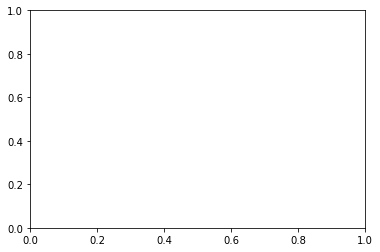

In [52]:
plt.plot(episodes, scores)

#### Epsilon-decay sample function

<div class="alert alert-block alert-info">
Try building a similar epsilon-decay function for your model.
</div>

In [55]:
time = np.arange(0,10000)
epsilon = []
for i in range(0,10000):
    epsilon.append(0 + (1 - 0) * np.exp(-0.0009*i))

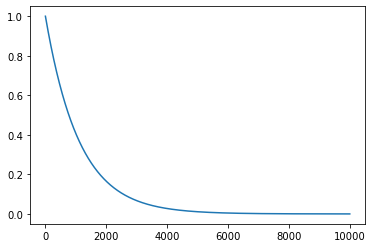

In [56]:
plt.plot(time, epsilon)
plt.show()